In Programming fundamentals you have been coding in Python using procedural oriented programming, and are familiar with its syntax. You have written small programs using functions. What if you have to write a real world complex application like an online shopping app? How would you go about doing it and where will you start?

In this course, you are going to learn how to build complex real world applications using a technique known as object oriented programming. We will be using an online shopping scenario to understand OOP concepts.

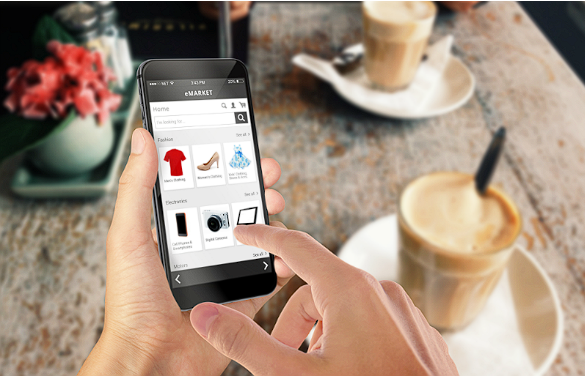

# **Problem Statement:**

Consider the below code which allows you to purchase different products. All products have discount of 10%.

Run the below code and observe the output.

In [1]:
def purchase_product(product_type, price):
    discount = 10
    total_price = price - price * discount / 100
    print("Total price of " +product_type+ " is "+str(total_price))

purchase_product("Mobile", 20000)
purchase_product("Shoe", 200)

Total price of Mobile is 18000.0
Total price of Shoe is 180.0


Let us say that we want to update our code such that:

if the mobile brand is Apple then the discount is 10% else the discount is 5%
all shoes have 2% tax and no discount
We can accomplish this by adding additional parameters to the function and updating the logic.

Run the below code and observe the output.

In [ ]:
def purchase_product(product_type, price, mobile_brand = None):
    if product_type == "Mobile":
        if mobile_brand == "Apple":
            discount = 10
        else:
            discount = 5
        total_price = price - price * discount / 100
    else:
        total_price = price + price * 2 / 100

    print("Total price of " +product_type+ " is "+str(total_price))

purchase_product("Mobile", 20000, "Apple")
purchase_product("Shoe", 200)


Total price of Mobile is 18000.0
Total price of Shoe is 204.0


# **Increasing Problems - Try out**
The solution we came up with has a key problem. Data for mobiles and shoes are mixed up in the same code. If we have to make changes to the logic for purchasing shoes, we have to modify method that has logic for both shoes and mobiles. For example, if we have to add 'material' to the shoe and have a 5% tax on 'leather' shoes, then we have to go through code related to mobile as well, as shown below:

In [ ]:
def purchase_product(product_type,price,mobile_brand,material):
    if product_type == "Mobile":
        if mobile_brand == "Apple":
            discount = 10
        else:
            discount = 5
        total_price = price - price * discount / 100
    else:
        if material == "leather":
            tax = 5
        else:
            tax = 2
        total_price = price + price * tax / 100
    print("Total price of "+product_type+" is "+str(total_price))

purchase_product("Mobile",20000,"Apple",None)
purchase_product("Shoe",200,None,"leather")


Total price of Mobile is 18000.0
Total price of Shoe is 210.0


# **Modular Programming - The Problem Statement**
A better solution would be to modularize the code and separate the logic for Mobiles and Shoes.

Modify the code in the below code pane as per the following guidelines:

Create two functions: purchase_mobile and purchase_shoe
purchase_mobile() takes two parameters: price and brand
purchase_shoe() takes two parameters: price and material
If the mobile brand is “Apple”, discount is 10%, else discount is 5%
If the shoe material is “leather”, tax is 5%, else tax is 2%

In [ ]:
def purchase_mobile(price,brand):
    if brand == "Apple":
        discount = 10
    else:
        discount = 5
    total_price = price - price * discount / 100

    print("Total price of Mobile is "+str(total_price))

def purchase_shoe(price,material):
    if material == "leather":
        tax = 5
    else:
        tax = 2
    total_price = price + price * tax / 100

    print("Total price of Shoe is "+str(total_price))

purchase_mobile(20000,"Apple")
purchase_shoe(200,"leather")


Total price of Mobile is 18000.0
Total price of Shoe is 210.0


# **Increasing requirements**
We want to provide users with facility to return products as well. During return, refund amount should be displayed.

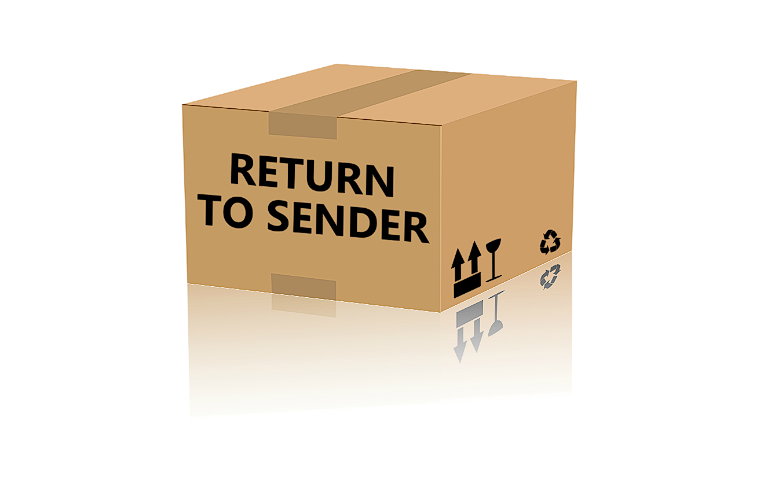

How do we go about displaying the refund amount?
 One way is to recalculate the price as shown below.

In [ ]:
def return_mobile(price, brand):
    if brand == "Apple":
        discount = 10
    else:
        discount = 5
    total_price = price - price * discount / 100

    print("Refund price for Mobile is "+str(total_price))

def return_shoe(price, material):
    if material == "leather":
        tax = 5
    else:
        tax = 2
    total_price = price + price * tax  /100

    print("Refund price for Shoe is "+str(total_price))

return_mobile(1000, "Samsung")


Refund price for Mobile is 950.0


**Here, price calculation logic is repeated in purchase as well as in return functions. This obviously is a bad idea.**

Alternatively we can use global variables. We calculate the price during purchase and store it in a global variable. Later during return we access the calculated price from the global variable. But this brings more complications than it tries to solve.

In [ ]:
total_price_mobile = 0
total_price_shoe = 0
def purchase_mobile(price,brand):
    global total_price_mobile
    if brand == "Apple":
        discount = 10
    else:
        discount = 5
    total_price_mobile = price - price * discount / 100
    print("Total price for Mobile is "+str(total_price_mobile))

def purchase_shoe(price,material):
    global total_price_shoe
    if material == "leather":
        tax = 5
    else:
        tax = 2
    total_price_shoe = price + price * tax / 100
    print("Total price for Shoe is "+str(total_price_shoe))

def return_mobile():
    print("Refund price for Mobile is ",total_price_mobile)

def return_shoe():
    print("Refund price for Shoe is ",total_price_shoe)

purchase_mobile(20000,"Apple")
purchase_shoe(200,"leather")
return_mobile()


Total price for Mobile is 18000.0
Total price for Shoe is 210.0
Refund price for Mobile is  18000.0


What if we want to purchase two mobiles and return one of them? Which will be returned? Also, can we be sure that purchase_shoe() won't accidentally modify the global value for mobile?

In [ ]:
total_price_mobile = 0
total_price_shoe = 0
def purchase_mobile(price,brand):
    global total_price_mobile
    if brand == "Apple":
        discount = 10
    else:
        discount = 5
    total_price_mobile = price - price * discount / 100
    print("Total price for Mobile is "+str(total_price_mobile))

def purchase_shoe(price,material):
    global total_price_shoe
    if material == "leather":
        tax = 5
    else:
        tax = 2
    total_price_shoe = price + price * tax / 100
    print("Total price for Shoe is "+str(total_price_shoe))

def return_mobile():
    print("Refund price for Mobile is ",total_price_mobile)

def return_shoe():
    print("Refund price for Shoe is ",total_price_shoe)

purchase_mobile(20000,"Apple")
purchase_shoe(200,"leather")
purchase_mobile(2000,"Samsung")
return_mobile()


Total price for Mobile is 18000.0
Total price for Shoe is 210.0
Total price for Mobile is 1900.0
Refund price for Mobile is  1900.0
Total price for Mobile is 18000.0
Total price for Shoe is 210.0
Total price for Mobile is 1900.0
Refund price for Mobile is  1900.0


We can see that with our current style of programming, we quickly run into complications trying to simulate real world scenarios, like purchasing and returning a product.

The problem arises due to the fact that in real life everything has some data/characteristic associated with it and some behavior associated with it and we are not able to replicate this in a code. For example:

All mobiles have price and brand as its data and purchase and return as its behavior.

All shoes have price and material as its data and purchase and return as its behavior.




We need a way of programming which allows to club together the data and behavior so that it becomes easier to code real world scenarios.

# **OOP BASICS**

***Approach(Clubbing data & behaviour)***

Object oriented programming approach allows us to club together the data and behavior so that it becomes easier to code real world scenarios.

Consider the following example, where Mobile and Shoe clubs characteristics as data & purchase(), return() as it's behavior.

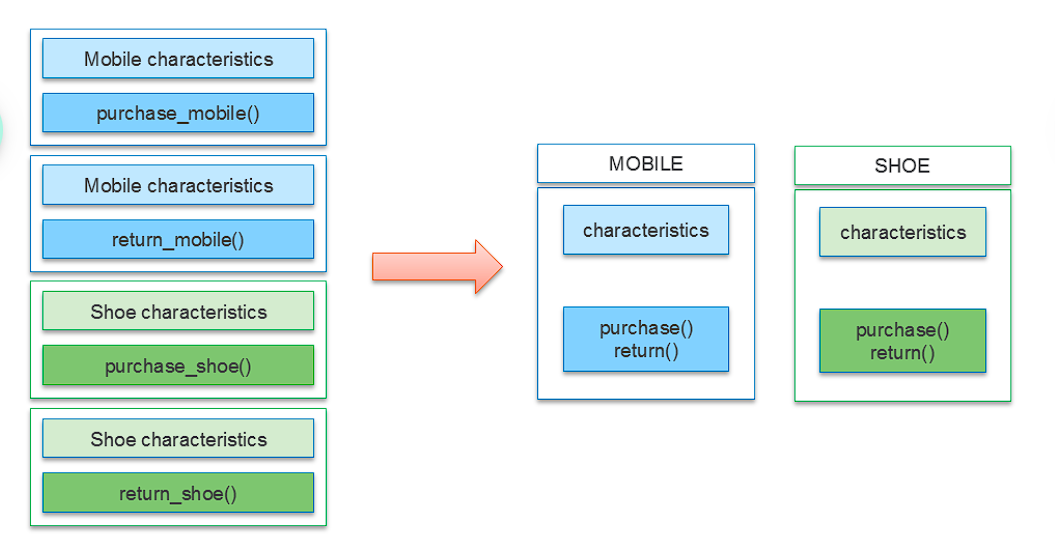

# ***Templating***

Once we have a template of the data and the related behavior we can use that template to create many copies.
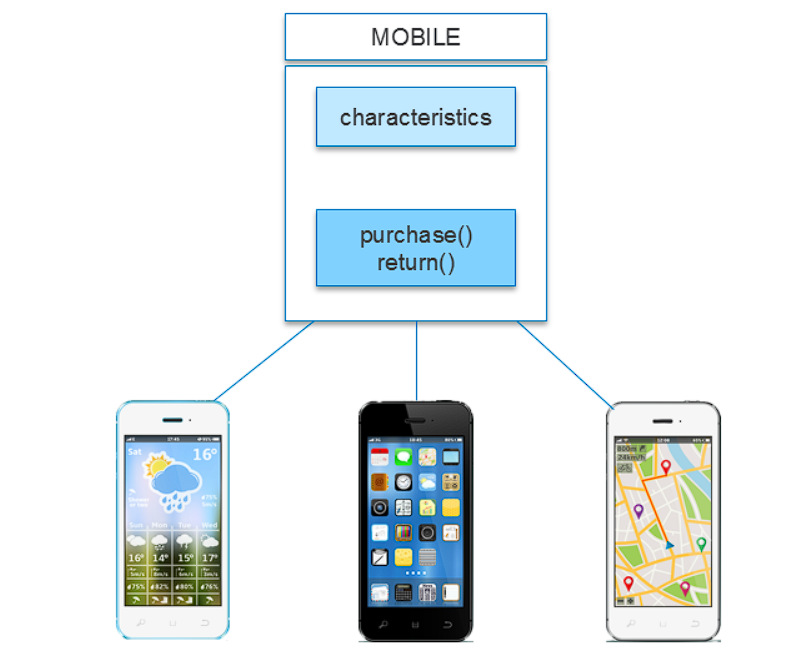

This style of programming where we create a template and create copies from that template is called object oriented programming. This style allows us to code for scenarios closely linked with real life.

The template we create is called a Class and the copies we create out of it is called an object.

# **CLASS & OBJECT**

Objects are real world entities. Anything you can describe in this world is an object. Classes on the other hand are not real. They are just a concept. Class is a short form of Classification. A class is a classification of certain objects and it is just a description of the properties and behavior all objects of that classification should possess.

Class is a like a recipe and the object is like the cupcake we bake using it. All cupcakes created from a recipe share similar characteristics like shape, sweetness, etc. But they are all unique as well. One cupcake may have strawberry frosting while another might have vanilla. Similarly, objects of a class share similar characteristics but they differ in their values for those characteristics.      

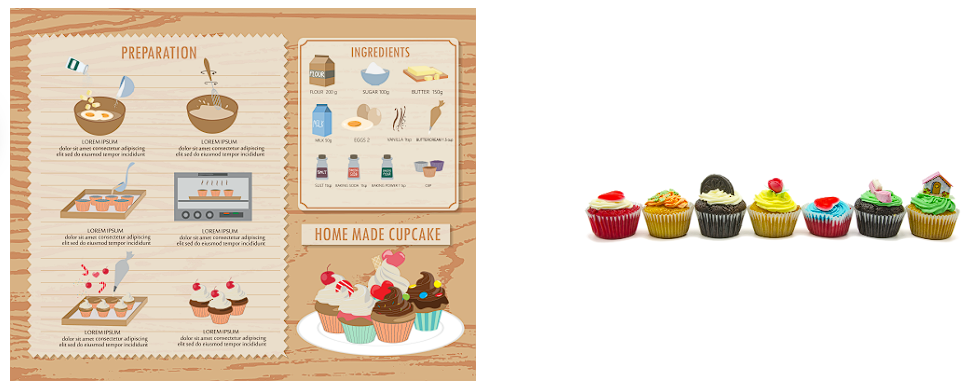

**What does a class contain?**

What does a recipe contain? It contains list of ingredients which make up the cake and the directions. Similarly, a class contains the properties/attributes of the object and the operations/behavior that can be performed on an object.

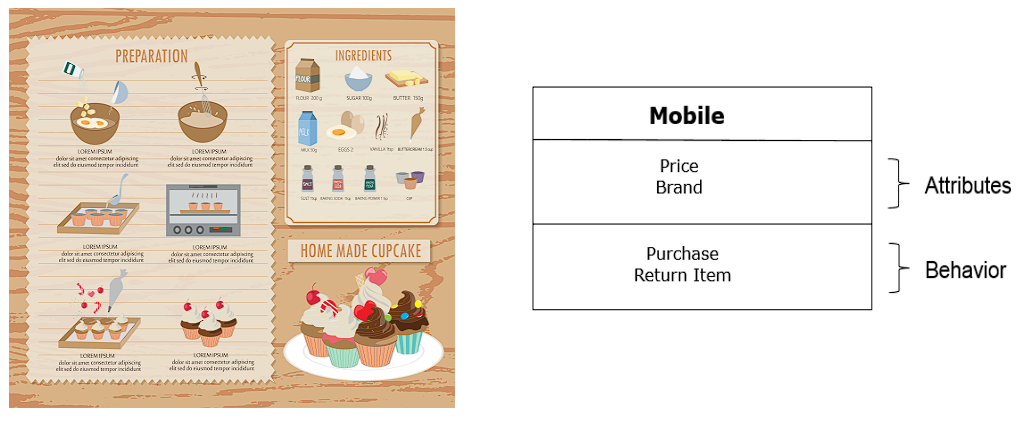

# Class, Object & Reference Variable Creation

A class is defined using the class keyword in python. For example, the below code creates a class called Mobile without any attributes or behavior.

In [ ]:
class Mobile:
    pass


To create an object, we need a class. The syntax for creating an object is "**classname()**", where **classname** is the name of the class.

For example, the below code creates three Mobile objects:

In [ ]:
Mobile()
Mobile()
Mobile()


# **Accessing values**

Is the below a valid piece of code?

In [ ]:
10
10
10


10

Yes. We are just creating 3 values in three lines without storing them in any variable and hence we cannot access them.

Just like we need variables to access and use values, we need variables to access and reuse the objects that we create. Such variables that are used to access objects are called reference variables .

In the below code, we are creating three objects, each with its own reference variable

In [ ]:
mob1=Mobile()
mob2=Mobile()
mob3=Mobile()


# **Look alike Object - Try out**

**Problem Statement**

If two objects look the same and have the same values, can we treat it as a single object?

Each object is unique and independent of other object. Just like every person, including twins, are unique, so is every object.

All objects have an internal unique id (just like aadhar or green card number). We can check this using the inbuilt id(). The below code will display the unique number associated with the object

In [ ]:
class Mobile:
    pass

mob1=Mobile()
mob2=Mobile()

print(id(mob1))
print(id(mob2))

136604297628592
136604297631760


# **Attributes of an Object - Try out**

Problem Statement
How can we create attributes and values for those attributes? This can be done by using the . (dot) operator. The syntax for creating attribute and value for that is as below:

reference_variable.attribute_name=value.

For example, in the below code we are creating two attributes price and brand, and assigning them to the two objects we had created

In [ ]:
class Mobile:
    pass

mob1=Mobile()
mob2=Mobile()

mob1.price=20000
mob1.brand="Apple"

mob2.price=3000
mob2.brand="Samsung"


# **Accessing Attributes - Try out**
Problem Statement
We can access the attribute values using the dot operator itself. The syntax is as shown below:

reference_variable.attribute_name

For example,

print (mob1.brand)

print (mob2.brand)

In [ ]:
class Mobile:
    pass

mob1=Mobile()
mob2=Mobile()

mob1.price=20000
mob1.brand="Apple"

mob2.price=3000
mob2.brand="Samsung"

print (mob1.brand)
print (mob2.brand)


Apple
Samsung


# **Additional Attributes - Try out**
In python, we can create attributes for a specific object alone. In the below example, the mob1 object has an ios version which mob2 does not have.

In [2]:
class Mobile:
    pass

mob1=Mobile()
mob2=Mobile()

mob1.price=20000
mob1.brand="Apple"
mob1.ios_version=10

mob2.price=3000
mob2.brand="Samsung"


print(mob1.price,mob1.brand,mob1.ios_version)
print(mob2.price,mob2.brand)

20000 Apple 10
3000 Samsung


# **Assigning vs Updating - Try out**
Problem Statement
We can update the value of an existing attribute using the dot operator. For example, the below code will change the ios_version of mob1 object, since the mob1 object already has that attribute.

mob1.ios_version=11
In python, if we assign a value to a non-existent attribute, it will create that attribute for that object alone. For example, the below code will create an attribute for mob2 object alone.

mob2.android_version="Marshmallow"

In [ ]:
class Mobile:
    pass

mob1=Mobile()
mob2=Mobile()

mob1.price=20000
mob1.brand="Apple"
mob1.ios_version=10

mob1.ios_version=11

mob2.price=3000
mob2.brand="Samsung"

mob2.android_version="Marshmallow"

print(mob1.ios_version)
print(mob2.android_version)



11
Marshmallow


# **Accessing a Non-Existing Attribute - Try out**
Problem Statement
If we try to access a non-existing attribute, we will get an Attribute Error.

For example,

print (mob2.ios_version)

In [ ]:
class Mobile:
    pass

mob1=Mobile()
mob2=Mobile()

mob1.price=20000
mob1.brand="Apple"
mob1.ios_version=10

mob2.price=3000
mob2.brand="Samsung"

print(mob1.ios_version)
print(mob2.ios_version)



10


AttributeError: 'Mobile' object has no attribute 'ios_version'

# **Variable vs Attribute**
The rules for a class attribute are very similar to a variable. You just have to treat reference_variable.attribute_name as a variable.




Variable_name = value; creates the variable and assigns the value if the variable does not exist already.

For example:

In [ ]:
variable1 = 5



reference_variable.attribute_name = value; creates the attribute and assigns the value if the attribute does not exist already.

 For example:
```
reference_variable1.color = "Green"
```


Variable_name = value updates the the value if the variable exists already.

For example:
```
variable1 = 5
variable1 = 6
```



reference_variable.attribute_name = value updates the attribute if the attribute exists already.

For example:


```
reference_variable1.color = "Green"
reference_variable1.color = "Red"

```



Accessing a non-existent variable throws an error in both variable as well as attribute.

A variable can be assigned to another variable.

For example:


```
variable2 = variable1

```



The value of an attribute can be assigned to another variable.

For example:


```
variable1 = reference_variable1.color

```



# **Best Practice - Try out**
Can you guess what will be the output of the below code? Will it give an error? If yes then why? If no, then why not?



In [ ]:
class Mobile:
    pass

mob1=Mobile()
mob2=Mobile()

mob1.price=20000
mob1.brand="Apple"
mob1.ios_version=11
print(mob1.ios_version)

mob2.price=3000
mob2.brand="Apple"
mob2.ios_versio=12
print(mob2.ios_versio)



11
12


# **Problem Statement**
The below code will not give an error. However, mob2 will have an attribute ios_versio. This spelling mistake creates a new attribute! Hence be careful when assigning values to attributes of an object.

The best practice is to ensure all objects of a class have the same set of attributes. Very rarely should we create separate set of attributes for different objects. Also, languages like Java, C# etc do not allow us to create different set of attributes for different objects like python does.

In [ ]:
class Mobile:
    pass

mob1=Mobile()
mob2=Mobile()

mob1.price=20000
mob1.brand="Apple"
mob1.ios_version=11
print(mob1.ios_version)

mob2.price=3000
mob2.brand="Apple"
mob2.ios_versio=11
print(mob2.ios_versio)



11
11


# Creating Common Attributes
We have already seen the problem arising out of human error in creating attributes individually for objects. Apart from this problem we also have to deal with the problem of lack of reuse. For example if an object has 10 attributes and we have 10 objects, then we have to write 100 lines of code! There is no reuse at all.

We need a way to mention the attributes of all the objects of a class in one place so that we can create and initialize the attributes. Let us see how to do this.

# How do we create attributes in a class?
Attributes can be added to a class through a special function called (--init--)**[Replace hyphen with underscore]**. We will discuss more about the syntax later. But for now, this is how the mobile class will look like with attributes in it.

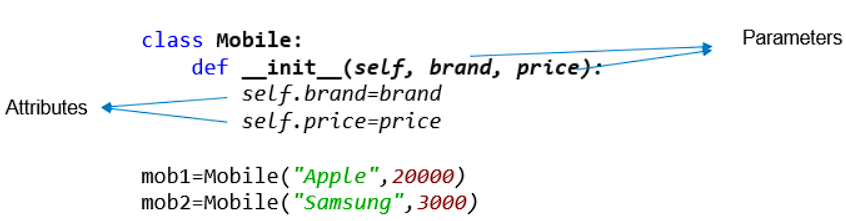


In the code, brand and price are the attributes. All objects of this class will now have these attributes automatically. Here mob1 is assigned “Apple” and 20000 as values for the attributes brand and price respectively.

**Note**:The parameter names and attribute names need not match

# Constructor & Self - Introduction

When we create an object, the special __ init __() method inside the class of that object is invoked automatically. This special function is called as a **constructor.**

In [ ]:
class Mobile:
    def __init__(self):
        print("Inside constructor")
mob1=Mobile()


Inside constructor


 **self** is not a keyword. **self refers to the current object being executed.**

In [3]:
class Mobile:
    def __init__(self):
        print("Id of self in constructor:", id(self))
mob1=Mobile()
id(Mobile)


Id of self in constructor: 140132850266320


101207287355760

# **Parameterless Constructor**
You can create a constructor without parameters. But this is rarely useful.
Run the below code and observe the output.

In [ ]:
class Mobile:
    def __init__(self):
        print("Inside constructor")


mob1=Mobile()
mob2=Mobile()




Inside constructor
Inside constructor


# **Parameterized Constructor - Try out**

If a constructor takes parameters then it would be called as parameterized constructor.

Run the below code and observe the output.

In [ ]:
class Mobile:
    def __init__(self, brand, price):
        print("Inside constructor")
        self.brand = brand
        self.price = price

mob1=Mobile("Apple", 20000)
print("Mobile 1 has brand", mob1.brand, "and price", mob1.price)

mob2=Mobile("Samsung",3000)
print("Mobile 2 has brand", mob2.brand, "and price", mob2.price)

Inside constructor
Mobile 1 has brand Apple and price 20000
Inside constructor
Mobile 2 has brand Samsung and price 3000


# **Parameterless & Parameterized Constructor - Try out**

If a constructor takes parameters and if we invoke it with a different number of parameters, the error message will indicate how many parameters were missed out or exceeded.

Run the below code and observe the output.

In [ ]:
class Mobile:
    def __init__(self,one,two):
        print("Inside constructor")

#Uncomment each line below. Try it out and observe the output.
#mob1=Mobile()
mob1=Mobile(100,200,300)

TypeError: Mobile.__init__() takes 3 positional arguments but 4 were given

# **Attribute Creation Using self - Try out**

By using self.attribute_name and assigning a value we are creating attributes to the current object. The best practice is to create attributes inside the constructor.
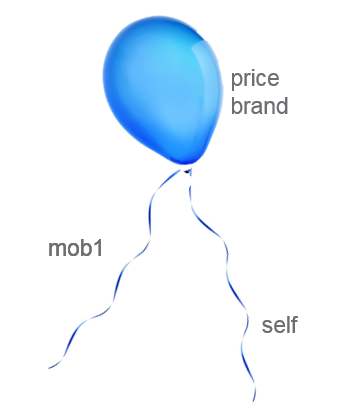

In [ ]:
class Mobile:
    def __init__(self, price, brand):
        print("Id of self in constructor", id(self))
        self.price = price
        self.brand = brand

mob1=Mobile(1000, "Apple")
print("Id of mob1 in driver code", id(mob1))

mob2=Mobile(1000, "Apple")
print("Id of mob2 in driver code", id(mob2))


Id of self in constructor 132410052128448
Id of mob1 in driver code 132410052128448
Id of self in constructor 132410052336064
Id of mob2 in driver code 132410052336064


# **Attribute vs Local Variable - Try out**

Problem Statement
Attributes can be created only by using the self variable and the dot operator. Without self we are only creating a local variable and not an attribute.

In [ ]:
class Mobile:
    def __init__(self):
        print ("Inside the Mobile constructor")
        self.brand = "Apple"
        brand = "Apple" #This is a local variable.
        #Variables without self are local and they dont
        #affect the attributes.

        #Local varaibles cannot be accessed outside the init
        #Using self creates attributes which are
        #accessible in other methods as well

mob1=Mobile()
print(mob1.brand)#This does not print Apple
#This prints None because brand=Apple creates
#a local variable and it does not affect the attribute

Inside the Mobile constructor
Apple


# **Creating Behaviors - Try out**

Problem Statement
We can create behavior in a class by adding functions in a class. However, such functions should have a special parameter called self as the first parameter.

Such functions which describe the behavior are also called as methods. We can invoke the methods using the dot operator as shown.

Even though purchase() is accepting a parameter called self, we need not pass it when we invoke it.
                                                    

In [ ]:
class Mobile:
    def __init__(self):
        print("Inside constructor")

    def purchase (self):
        print("Purchasing a mobile")

mob1=Mobile()
mob1.purchase()

Inside constructor
Purchasing a mobile


# **Method Accessing Attributes - Try out**

Problem Statement

We can access an attribute in a method by using self. Value of the attribute accessed inside the method is determined by the object used to invoke the method.

For example, in the code below when we invoke purchase using mob1, attribute values (Apple and 20000) of mob1 are accessed.

Similarly, when mob2 is used to invoke purchase, attribute values (Samsung and 3000) of mob2 are accessed in purchase().

In [8]:
class Mobile:
    def __init__(self, brand, price):
        print("Inside constructor")
        self.brand = brand
        self.price = price


    def purchase(self):
        print("Purchasing a mobile")
        print("This mobile has brand", self.brand, "and price", self.price)

print("Mobile-1")
mob1=Mobile("Apple", 20000)
mob1.purchase()

print("Mobile-2")
mob2=Mobile("Samsung",3000)
mob2.purchase()


Mobile-1
Inside constructor
Purchasing a mobile
This mobile has brand Apple and price 20000
Mobile-2
Inside constructor
Purchasing a mobile
This mobile has brand Samsung and price 3000


# **Invoking Methods - Try out**
We can also invoke one method from another using self.

For example:

In [9]:
class Mobile:
    def display(self):
        print("Displaying details")

    def purchase(self):
        self.display()
        print("Calculating price")

Mobile().purchase()


Displaying details
Calculating price



# **Identify Invoking Object - Try out**
Problem Statement:
In the below code, how does return_product() method know which mobile object we are using?



mob2.return_product():
mob2.return_product() can also be invoked as Mobile.return_product(mob2).

Thus self now refers to mob2. For simplicity sake and for better readability we use mob2.return_product() instead of Mobile.return_product(mob2).

In [ ]:
class Mobile:
    def __init__(self,price,brand):
        print (id(self))
        self.price = price
        self.brand = brand

    def return_product(self):
        print (id(self))
        print ("Brand being returned is ",self.brand," and price is ",self.price)

mob1 = Mobile(1000, "Apple")
print ("Mobile 1 has id", id(mob1))

mob2=Mobile(2000, "Samsung")
print ("Mobile 2 has id", id(mob2))

mob2.return_product()
Mobile.return_product(mob2)




137821673877136
Mobile 1 has id 137821673877136
137821890710592
Mobile 2 has id 137821890710592
137821890710592
Brand being returned is  Samsung  and price is  2000
137821890710592
Brand being returned is  Samsung  and price is  2000


# Deep Dive Into self & Methods
Deep Dive into self

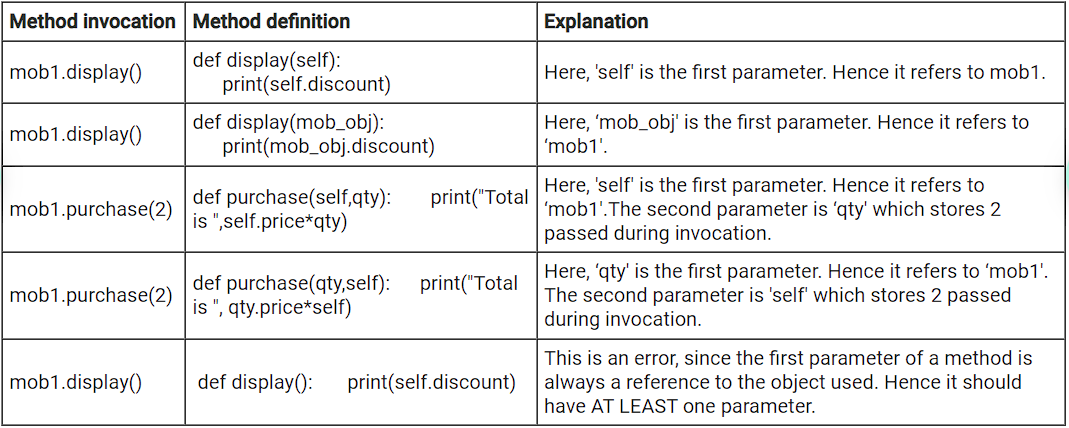

Deep Dive into methods

In python, everything is an object. Thus everything would have either attributes or behavior or both. That means even numbers, strings, list, set, dictionary, etc are all treated as objects in python. For example,



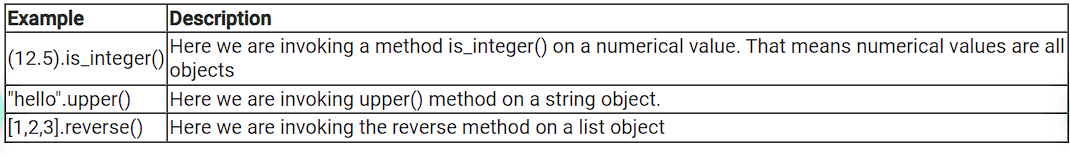

Difference between Function and Method:
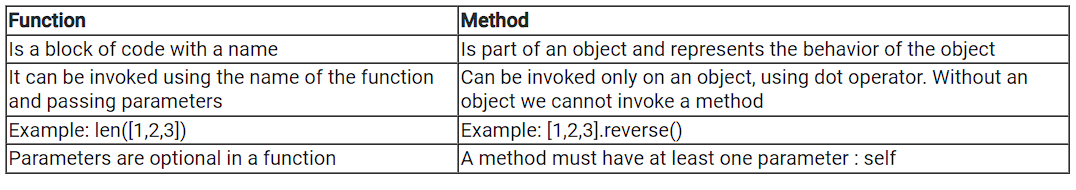

# **Exercise on class design - Level 1**
Exercise :

Jack (24 years old) and Jill (27 years old) are two employees working in a multi-national company. They draw salaries 30000 and 40000 respectively.

Identify the class name and attributes so as to represent Jack and Jill from the list given.

Options:

Jill

salary

Jack

age

__init __

Employee

name


